In [1]:
import sympy as sym #simbolica
import matplotlib.pyplot as plt #importa matplotlib solo pyplot
import matplotlib.image as mpimg 
from IPython.display import Image #para importar y mostrar en jupyter imagenes

sym.init_printing() #activa a jupyter para mostrar simbolicamente el output
#%matplotlib widget 
%matplotlib inline

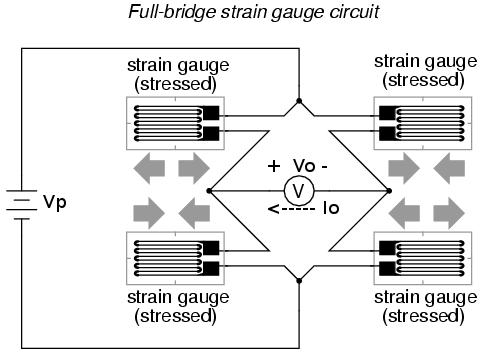

In [2]:
# Puente completo celda de carga es como se observa en la imagen.
Image(filename='straingauge.png',width=300)  

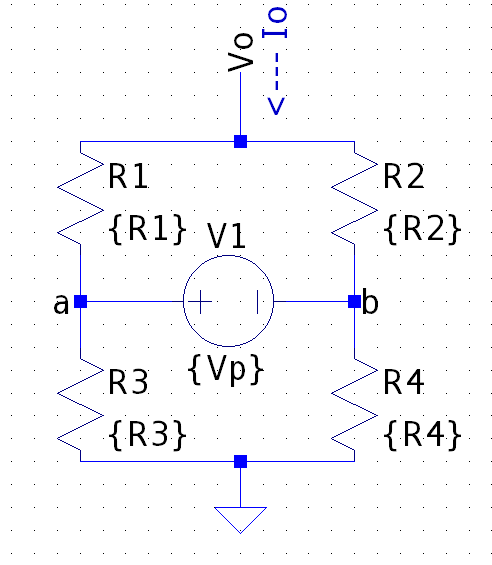

In [3]:
Image(filename='esq_sg.png',width=250)  #Circuito esquematico cambiando el enfoque

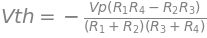

In [10]:
#Se busca el equivalente theveniN
#Se van a plantear ecuaciones nodales
#Vth es el voltaje en Vo cuando Io=0 => CA

sym.var('R1, R2, R3, R4, Io, Vo, Vth')
sym.var('Va, Vb, Vp')
find=sym.Matrix(([Vo], [Va], [Vb])) #son las incognitas
ec_p_0=sym.Eq((Va-Vo)/R1+(Vb-Vo)/R2,0) # Nodo Vo ; Io=0
ec_p_1=sym.Eq((Va-Vb),Vp) #SuperNodo
ec_p_2=sym.Eq((Va/R3)+Vb/R4,0) # Tierra Io=0
display(sym.Eq(Vth,sym.factor(sym.simplify(sym.solve([ec_p_0,ec_p_1,ec_p_2],find)[Vo]))))
Vth=sym.solve([ec_p_0,ec_p_1,ec_p_2],find)[Vo]

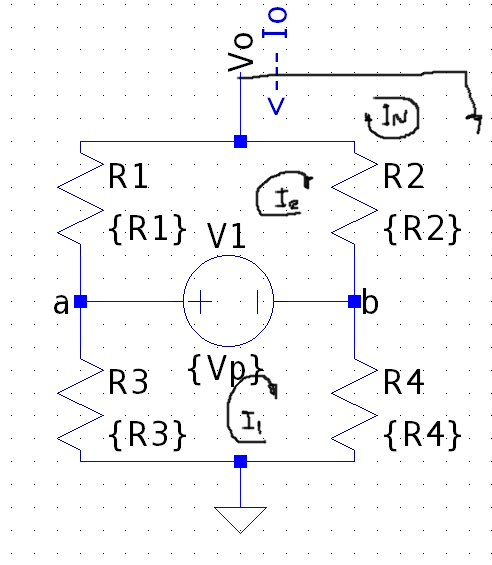

In [5]:
#Circuito para encontrar eq. Norton Io=-In Vo=0 -> CC
Image(filename='esq_sg2.png',width=250)  

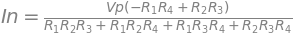

In [6]:
#Se busca el equivalente Norton y se usa LKV
sym.var('I1,I2,In')
ec_p_3=sym.Eq(I1*R3+Vp+(I1-In)*R4,0)
ec_p_4=sym.Eq(I2*R1+(I2-In)*R2,Vp)
ec_p_5=sym.Eq((In-I1)*R4+(In-I2)*R2,0)
display(sym.Eq(In,sym.simplify(sym.factor(sym.solve([ec_p_3,ec_p_4,ec_p_5],(In,I1,I2))[In]))))
In=sym.solve([ec_p_3,ec_p_4,ec_p_5],(In,I1,I2))[In]

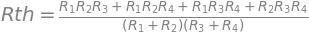

In [7]:
#Por lo tanto La resistencia de Thevenin
sym.var('Rth')
display(sym.Eq(Rth,sym.simplify(sym.factor(Vth/In))))
Rth=sym.simplify(Vth/In)

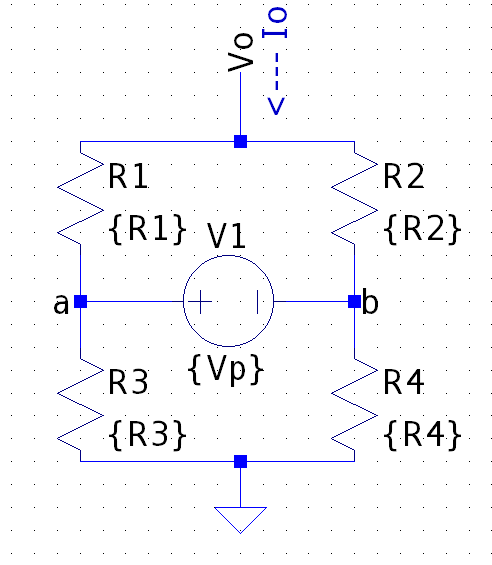

In [8]:
#Calculo de forma directa
Image(filename='esq_sg.png',width=250)  #Circuito esquematico cambiando el enfoque


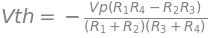

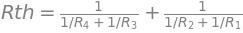

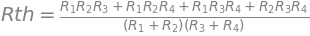

In [9]:
#De forma directa Vth es VR2+VR4 
# Vth= Vp/(R1+R2) * R2 - Vp/(R3+R4) * R4
# Rth cuando Vp=0 es Rth=R1//R2 + R3//R4
sym.var('Vth_, Rth_')
display(sym.Eq(Vth_,sym.simplify(sym.factor(Vp*(R2/(R1+R2)-R4/(R3+R4))))))
Vth_=sym.fu((Vp/(R1+R2))*R2-(Vp/(R3+R4))*R4)

display(sym.Eq(Rth_,(R1**-1+R2**-1)**-1+(R3**-1+R4**-1)**-1))
display(sym.Eq(Rth_,sym.simplify(sym.factor((R1**-1+R2**-1)**-1+(R3**-1+R4**-1)**-1))))

Rth_=sym.factor(((R1**-1+R2**-1)**-1)+(R3**-1+R4**-1)**-1)
